In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [25]:
quotes = []
authors = []
tags = []

for page in range(1, 6):  # Pages 1 to 5
    url = f"http://quotes.toscrape.com/page/{page}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    quote_blocks = soup.find_all("div", class_="quote")

    for quote in quote_blocks:
        text = quote.find("span", class_="text").text.strip()
        author = quote.find("small", class_="author").text.strip()
        tag_list = [tag.text for tag in quote.find_all("a", class_="tag")]

        quotes.append(text)
        authors.append(author)
        tags.append(", ".join(tag_list))

print(f"Total Quotes Scraped: {len(quotes)}")


Total Quotes Scraped: 50


In [26]:
df = pd.DataFrame({
    "Quote": quotes,
    "Author": authors,
    "Tags": tags
})

df.head()


,Quote,Author,Tags
0,“The world as we have created it is a process ...,Albert Einstein,"change, deep-thoughts, thinking, world"
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,"abilities, choices"
2,“There are only two ways to live your life. On...,Albert Einstein,"inspirational, life, live, miracle, miracles"
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,"aliteracy, books, classic, humor"
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,"be-yourself, inspirational"


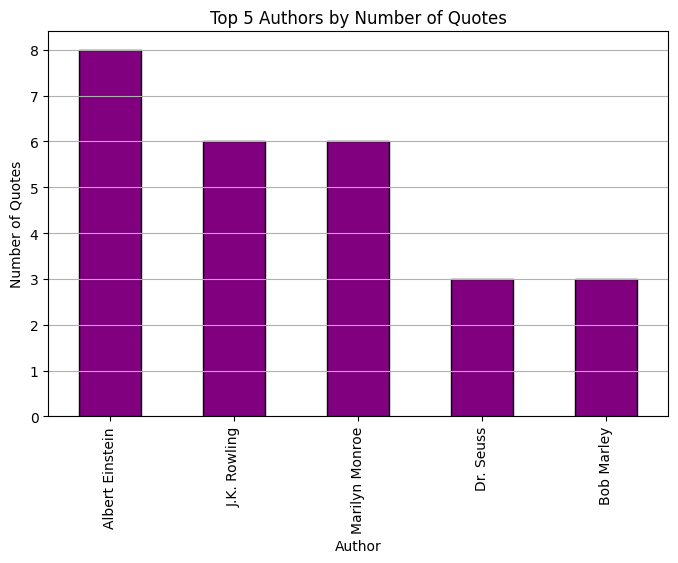

In [27]:
author_counts = df["Author"].value_counts().head(5)

plt.figure(figsize=(8, 5))
author_counts.plot(kind="bar", color="purple", edgecolor="black")
plt.title("Top 5 Authors by Number of Quotes")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.grid(axis='y')
plt.show()


In [28]:
from google.colab import files

df.to_csv("quotes_dataset.csv", index=False)
files.download("quotes_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>